# Application d'une méthode d'interpolation pour l'équation de Duffing

Le but de ce document est d'illustrer les méthodes développées lors de ce projet. Nous nous intéressons à faire l'interpolation entre deux espaces de solutions de l'oscillateur de Duffing. 

L'équation de Duffing est une équation différentielle non-linéaire du second ordre utilisée pour modéliser certains oscillateurs amortis et forcés. L'équation s'écrit
$$
    \ddot{x}(t) + \delta \dot{x}(t) + \alpha x(t) + \beta x^3(t) = \gamma \cos(\omega t)
$$
 
Les paramètres donnés dans l'équation caractérisent les différents effets : 

- $\delta$ contrôle le taux d'amortissement

- $\alpha$ contrôle la raideur linéaire

- $\beta$ contrôle le taux de non-linéarité dans la force restauratrice

- $\gamma$ est l'amplitude de la force conductrice périodique

- $\omega$ est la fréquence angulaire

L'équation de Duffing est un exemple de système dynamique simple pouvant présenter un comportement chaotique.

L'intérêt de cet exposé est le suivant. On va fixer les paramètres $\delta$, $\beta$ et $\omega$ pour le reste de l'étude. Puis, on s'intéresse à la résolution de cette équation pour deux paramètres $\gamma_1$ et $\gamma_2$ chacun regroupant la solution pour un certains nombres de $\alpha$ prédéfinis. En particulier, nous allons créer deux matrices $\Psi$ relative à $\gamma_1$ et $\Phi$ relative à $\gamma_2$ où leurs colonnes seront définies par les solutions de l'équation pour un certains nombres de $\alpha$. 

On prendre pour la suite $\gamma_1 = 1$ et $\gamma_2 = 3.5$. On approximera la solution pour 51 intervalles de temps. On considère 21 valeurs de $\alpha$ choisies entre 1 et 3. Ainsi on aura que $\Phi$ et $\Psi \in \mathcal{M}_{51,21}(R)$.

L'étape suivante sera d'orthonormaliser les deux matrices en réduisant leur nombre de vecteurs dans la base. On essaiera de passer de 21 vecteurs à 5 vecteurs dans la base. 

Finalement, on s'intéressera aux erreurs commises entre la solution exacte pour le paramètre 
$$
\gamma = \dfrac{\gamma_1 + \gamma_2}{2}
$$
et sa solution dans la base interpolée, déterminée via la notion de géodésique. 

On cherche à montrer que l'erreur en utilisant l'interpolation géodésique est inférieure à l'idée usuelle à savoir de faire la moyenne entre la solution pour $\gamma_1$ et $\gamma_2$.

Cette étude sera faite en utilisant le langage de programmation python.

On commence par importer les packages nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from random import *

On fixe ensuite les différents paramètres pour la suite de l'étude

In [5]:
print("-------------------------------------------------------------------")
print("--------------------- DEBUT DU PROGRAMME --------------------------")
print("-------------------------------------------------------------------")

#------------------------ DESCRIPTION DES PARAMETRES -----------------------

#DISCRETISATION TEMPORELLE
print("------------ Conditions initiales ------------------")
tmax = 50
print("tmax = ",tmax)
t = np.arange(0,tmax+1)

#CONDITIONS INITIALES DU SYSTEME
x0 = 0.
print("x0 = ",x0)
xdot0 = 0.
print("xdot0 = ", xdot0)
Z = [x0,xdot0]
print("Vecteur des conditions initiales Z = ", Z)
print("----------------------------------------------------")

#PARAMETRES FIXES "UNE BONNE FOIS POUR TOUTE"
print("-------- Paramètres définis pour le programme ------")
delta = 0.02
print("delta = ", delta)
beta = 5
print("beta = ", beta)
omega = 0.5
print("omega = ", omega)
print("----------------------------------------------------")

#PARAMETRES SUR LESQUELS ON JOUE

alpha = np.linspace(1,3,21)
print("alpha = ", alpha)
gamma_1 = 1
print("gamma_1 = ", gamma_1)
gamma_2 = 1.5
print("gamma_2 = ", gamma_2)

-------------------------------------------------------------------
--------------------- DEBUT DU PROGRAMME --------------------------
-------------------------------------------------------------------
------------ Conditions initiales ------------------
tmax =  50
x0 =  0.0
xdot0 =  0.0
Vecteur des conditions initiales Z =  [0.0, 0.0]
----------------------------------------------------
-------- Paramètres définis pour le programme ------
delta =  0.02
beta =  5
omega =  0.5
----------------------------------------------------
alpha =  [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3. ]
gamma_1 =  1
gamma_2 =  1.5


Pour la résolution de l'équation on utilise la fonction python "scipy.integrate.odeint" qui intègre un sytème d'équation différentielle ordinaire. Pour pouvoir utiliser cette fonction, il faut que l'on transforme l'équation du second ordre en un système d'équation du premier ordre. Puis, en utilisant les conditions initiales qui est pour nous le vecteur Z on peut écrire les fonctions suivantes.

In [1]:
#--------------------------- FONCTION VECTEURS DERIVES -------------------------
def deriv(Z,t,delta,beta,omega,alpha,gamma):
    dX = Z[1]
    dY = -delta*Z[1] - alpha*Z[0] - beta*(Z[0])**3 + gamma*np.cos(omega*t)
    dZ = [dX,dY]
    return dZ
#-------------------------------------------------------------------------------

#----------------------------- SOLUTION DE L'EDO -------------------------------
def solu_oscillateur(Z,t,delta,beta,omega,alpha,gamma):
    #sol est de taille(N,2) ---> la premiere colonne est la solution
    #et la seconde sa derivée.
    sol = odeint(deriv, Z, t, args = (delta,beta,omega,alpha,gamma))
    return sol
#-------------------------------------------------------------------------------

On peut regarder la solution de cette équation avec $\gamma_1$ et $\alpha = 1$. On affiche le graphique de $x(t)$ en fonction de $\dot{x}(t)$.

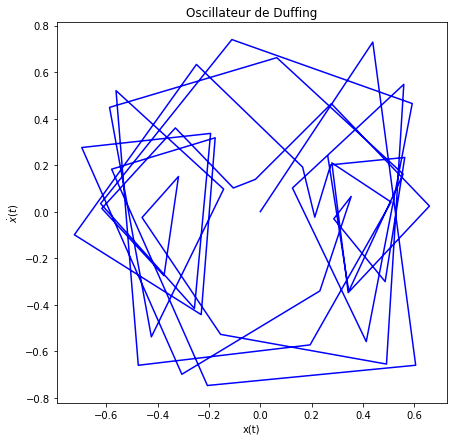

In [9]:
sol = solu_oscillateur(Z,t,delta,beta,omega,1,gamma_1)

def affichage(t,sol):

    fig = plt.figure(figsize = [7,7])
    ax = fig.add_subplot(111)
    ax.plot(sol[:,0], sol[:,1], 'b')
    plt.xlabel("x(t)")
    plt.ylabel("$\dot{x}(t)$")
    plt.title("Oscillateur de Duffing")

    plt.show()

affichage(t,sol)

On crée ensuite les deux matrices $\Phi$ et $\Psi$ comme décrite en introduction.

In [10]:
def base_gamma(Z,t,delta,beta,omega,alpha,gamma):
    N = np.size(alpha)
    BASE = np.zeros((np.size(t),N))
    for i in range(N):
        SOL = solu_oscillateur(Z,t,delta,beta,omega,alpha[i],gamma)
        BASE[:,i] = SOL[:,0]
    return BASE

#-------------------------- INITIALISATION DES BASES -----------------------
#PSY_INIT = BASE POUR GAMMA 1
PSY_INIT = base_gamma(Z,t,delta,beta,omega,alpha,gamma_1)
#PHI_INIT = BASE POUR GAMMA 2
PHI_INIT = base_gamma(Z,t,delta,beta,omega,alpha,gamma_2)
print("La taille de PSY_INIT est = ", np.shape(PSY_INIT))
print("La taille de PHI_INIT est = ", np.shape(PHI_INIT))

La taille de PSY_INIT est =  (51, 21)
La taille de PHI_INIT est =  (51, 21)


Puis on orthonormalise cette base tout en la réduisant. En particulier la fonction suivante utilise l'algorithme de Gramm-Schmidt avec la condition que si le résidu entre le nouveau vecteur et son projeté dans l'espace composé des vecteurs précédents est inférieur à un certain seuil, alors on ne le prend pas. En fait, on va chercher à avoir 2 matrices avec le MEME nombre de colonnes. Dans l'algorithme créé nous ne considérons pas de "seuil" mais plutôt la notion de "x vecteurs les plus orthonormaux" dans chaque matrice. 

In [11]:
def orthonormalisation(MATRIX, nbr_vect):

    N = np.shape(MATRIX)[0]
    k = np.shape(MATRIX)[1]

    ortho = []
    norm = []
    indice = []
    x_gamma = MATRIX[:,0]
    e = x_gamma/np.linalg.norm(x_gamma)
    ortho.append(e)

    for i in range(1,k):
        v = MATRIX[:,i]
        sum = np.zeros(N)

        for i in range(len(ortho)):
            sum += proj(v,ortho[i])

        u = v - sum
        norm.append(np.linalg.norm(u))
        e = u/np.linalg.norm(u)
        ortho.append(e)

    if nbr_vect > len(norm) + 1:
        print("ERREUR, veuillez saisir un nombre moins important de vecteurs de base à conserver")
        sys.exit()
    else:
        m = 0
        while m < nbr_vect - 1:
            indice.append(norm.index(min(norm)))
            norm[norm.index(min(norm))] = max(norm)
            m = m + 1

    ORTHO = np.zeros((N, nbr_vect))
    ORTHO[:, 0] = ortho[0]
    for i in range(len(indice)):
        ORTHO[:, i+1] = ortho[indice[i]+1]

    return ORTHO

In [14]:
#------------------------ FONCTION DE PROJECTION DE V SUR U --------------------
def proj(v,u):

    proj = np.dot(v,u)*u

    return proj
#-------------------------------------------------------------------------------

print("-----------MATRICES BASES ORTHONORMEES REDUITES ------")

k = 5
print("Le nombre de vecteurs de chaque base considéré est k = ", k)
PSY_ORTHO = orthonormalisation(PSY_INIT,k)
PHI_ORTHO = orthonormalisation(PHI_INIT,k)

print("La taille de PSY_ORTHO est = ", np.shape(PSY_ORTHO))
print("La taille de PHI_ORTHO est = ", np.shape(PHI_ORTHO))

-----------MATRICES BASES ORTHONORMEES REDUITES ------
Le nombre de vecteurs de chaque base considéré est k =  5
La taille de PSY_ORTHO est =  (51, 5)
La taille de PHI_ORTHO est =  (51, 5)


Finalement ci-après se trouve le code pour la méthode de la géodésique développée dans le rapport.

In [15]:
###########################################################################################################
########## FONCTIONS POUR L'INTERPOLATION VIA LES GEODESIQUES #############################################
###########################################################################################################

def solution_val_lim(PHI, PSY, t):

    U, SIGMA, V_T = svd(PHI, PSY)

    V = np.transpose(V_T)
    N = np.shape(SIGMA)[0]

    COS_T_SIGMA = np.zeros((N,N))
    SIN_T_SIGMA = np.zeros((N,N))

    for i in range(N):
        COS_T_SIGMA[i, i] = np.cos(t*SIGMA[i,i])
        SIN_T_SIGMA[i, i] = np.sin(t*SIGMA[i,i])

    #SOLUTION DE LA FORME : GAMMA(t) = GAMMA(0).V.cos(SIGMA*t) + U.sin(SIGMA*t)
    P1 = np.dot(np.dot (PHI,V), COS_T_SIGMA)
    P2 = np.dot(U, SIN_T_SIGMA)

    GAMMA_t = P1 + P2

    return GAMMA_t


def svd(PHI, PSY):

    PHI_PHI_T = np.dot(PHI, np.transpose(PHI))
    N = np.shape(PHI_PHI_T)[0]
    I = np.eye(N)
    PHI_T_PSY = np.dot(np.transpose(PHI),PSY)
    INV_PHI_T_PSY = np.linalg.inv(PHI_T_PSY)

    #INITIALISATION DE LA MATRICE SUR LEQUEL ON VA FAIRE LA SVD
    POUR_SVD = np.dot( np.dot( I - PHI_PHI_T , PSY ), INV_PHI_T_PSY )

    #SVD (ATTENTION : LE SIGMA SORTANT DE np.linalg.svd EST UN VECTEUR (k,))
    U, tnSIGMA, V_T = np.linalg.svd(POUR_SVD, full_matrices = False)

    SIGMA = np.arctan(tnSIGMA)

    #LE VECTEUR SIGMA TRANSFORME EN MATRICE (k,k)
    SIGMA = np.diag(SIGMA)

    return U, SIGMA, V_T

On peut donc créer la matrice d'interpolation au point $0.5$.

In [16]:
#----------------------- FAIRE INTERPOLATION A 0.5 AVEC GEODESIQUE  ------
INTERPOL = solution_val_lim(PSY_ORTHO,PHI_ORTHO,0.5)

On va considérer la solution dite "grossière" à savoir la moyenne entre les deux solutions pour $\gamma_1$ et $\gamma_2$

In [17]:
#----------------------- ON REGARDE LA SOLUTION GROSSIERE MOYENNE ----------
GROSSIERE = (PHI_INIT + PSY_INIT)/2

Et finalement on fait les calculs d'erreurs entre la solution exacte que l'on sait calculer au point $\dfrac{\gamma_1 +\gamma_2}{2}$ et son interpolation dans les bases créées. On fait une moyenne de l'erreur sur tous les $\alpha$.

In [18]:
#------------------------- CALCUL ERREUR ENTRE SOL EXACTE ET PROJETEE ----------
def erreur_moy_HF(INIT,Z,t,delta,beta,omega,alpha,gamma):

    PROJ = np.dot(INIT,np.transpose(INIT))
    N = np.size(alpha)
    erreur = 0
    for i in range(N):
        SHF = solu_oscillateur(Z,t,delta,beta,omega,alpha[i],gamma)
        SOL = SHF[:,0]
        erreur += np.linalg.norm(SOL - np.dot(PROJ,SOL))

    return erreur/N

In [20]:
#Paramètre gamma entre gamma1 et gamm2
gamma_mid = (gamma_1 + gamma_2)/2
print("gamma_mid = ", gamma_mid)

#---------------------- CALCUL D'ERREUR SUR LA SOLUTION --------------------
print("-------------------Les calculs d'erreur --------------")

erreur_PSY = erreur_moy_HF(PSY_ORTHO,Z,t,delta,beta,omega,alpha,gamma_1)
erreur_PHI = erreur_moy_HF(PHI_ORTHO,Z,t,delta,beta,omega,alpha,gamma_2)

print("L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base réduite PSY est, pour gamma_1 : ", erreur_PSY)
print("L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base réduite PHI est, pour gamma_2 : ", erreur_PHI)

erreur_INTERPOL = erreur_moy_HF(INTERPOL,Z,t,delta,beta,omega,alpha,gamma_mid)
print("L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base INTERPOLE est, pour gamma_mid : ", erreur_INTERPOL)

erreur_GROSSIERE = erreur_moy_HF(GROSSIERE,Z,t,delta,beta,omega,alpha,gamma_mid)
print("L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base GROSSIERE est, pour gamma_mid : ", erreur_GROSSIERE)

print("------------------------------------------------------")
print("-------------------------------------------------------------------")
print("--------------------- FIN DU PROGRAMME ----------------------------")
print("-------------------------------------------------------------------")

gamma_mid =  1.25
-------------------Les calculs d'erreur --------------
L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base réduite PSY est, pour gamma_1 :  0.8856345700688185
L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base réduite PHI est, pour gamma_2 :  1.5170437568056816
L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base INTERPOLE est, pour gamma_mid :  1.5331877754684795
L'erreur moyenne sur tous les alphas entre la solution exacte et la solution projetée sur la base GROSSIERE est, pour gamma_mid :  234.85677808062005
------------------------------------------------------
-------------------------------------------------------------------
--------------------- FIN DU PROGRAMME ----------------------------
-------------------------------------------------------------------


Finalement, on se rend compte du véritable intéret des interpolations décrites dans le rapport. En effet, on remarque que l'erreur commise sur la base grossière est énorme (234) et que celle sur la base interpolée par la notion de géodésique est dans l'ordre de grandeur de ce que l'on doit obtenir (autour de 1 selon les autres erreurs que l'on a considéré).